In [60]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [61]:
surf = np.linspace(-0.25, 0.25, 200)

In [63]:
def curve_func(x):
    return 1.- 0.1*np.cos((3*np.pi/0.5)*x )

y = curve_func(surf)

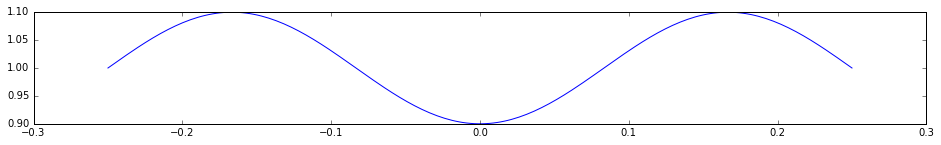

In [64]:
fig = plt.figure(figsize=(16, 2))

#Viscous diss
ax1 = fig.add_subplot(111)

plt.plot(surf, y)

In [65]:
import underworld as uw

In [66]:
y.min()
y.max()

1.0999968846894157

In [67]:
mesh = uw.mesh.FeMesh_Cartesian( elementType='Q1', elementRes=(16,16), minCoord=(-0.25,y.min()), maxCoord=(0.25,y.max()) )

In [68]:
ppc = 5
gSwarm = uw.swarm.Swarm(mesh=mesh)
layout = uw.swarm.layouts.PerCellRandomLayout(swarm=gSwarm, particlesPerCell=ppc)
    # Now use it to populate.
gSwarm.populate_using_layout( layout=layout )

In [69]:
swarmdata = gSwarm.particleCoordinates.data

In [70]:
swarmdata.shape

(1280, 2)

In [71]:
mesh2 = uw.mesh.FeMesh_Cartesian( elementType='Q1', elementRes=(16,2), minCoord=(-0.25,y.min()), maxCoord=(0.25,y.max()) )
tri = matplotlib.tri.Triangulation(mesh2.data[:,0], mesh2.data[:,1])

In [76]:
vals = np.copy(swarmdata[:,0])
vals[:] = 0
for index, height in enumerate(swarmdata):
    ##print height
    if height[1] > curve_func(height[0]):
        vals[index] = 1
    
    

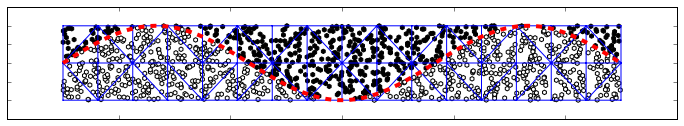

In [97]:
fig = plt.figure(figsize=(12, 2))

#Viscous diss
ax1 = fig.add_subplot(111)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

plt.plot(surf, y, 'r--', lw=4)
plt.triplot(tri)
plt.scatter(swarmdata[:,0], swarmdata[:,1], c = vals, marker="h", cmap=plt.cm.binary)
fig.savefig('stickyair.png')